In [110]:
import json
import os
from os.path import isfile, join, dirname
from ntpath import realpath
import matplotlib.pyplot as plt
import pandas as pd

outputfolder = join(os.getcwd(), 'output')

createpath = lambda fn: join(outputfolder, fn)
load_json = lambda path: json.load(open(path))

filenames = [
    filename
    for filename in os.listdir(outputfolder) 
    if isfile(createpath(filename))
        and filename.endswith('.json')
]

categories = set(
    int(filename[0])
    for filename in filenames
)

filenames_by_category = {}

for c in categories:
    filenames_by_category[c] = []
    for f2 in filenames:
        if f2[0]==str(c):
            filenames_by_category[c].append(f2)

print(filenames_by_category)

{1: ['1_07-11-2021_17-10-29.json', '1_07-11-2021_17-10-31.json', '1_07-11-2021_17-10-33.json', '1_07-11-2021_17-10-34.json', '1_07-11-2021_17-10-36.json'], 2: ['2_07-11-2021_17-10-37.json', '2_07-11-2021_17-10-41.json', '2_07-11-2021_17-10-45.json', '2_07-11-2021_17-10-49.json', '2_07-11-2021_17-10-53.json'], 3: ['3_07-11-2021_17-10-57.json', '3_07-11-2021_17-10-59.json', '3_07-11-2021_17-11-00.json', '3_07-11-2021_17-11-02.json', '3_07-11-2021_17-11-03.json'], 4: ['4_07-11-2021_17-11-04.json', '4_07-11-2021_17-11-08.json', '4_07-11-2021_17-11-12.json', '4_07-11-2021_17-11-16.json', '4_07-11-2021_17-11-20.json'], 5: ['5_07-11-2021_17-11-23.json', '5_07-11-2021_17-11-27.json', '5_07-11-2021_17-11-31.json', '5_07-11-2021_17-11-35.json', '5_07-11-2021_17-11-40.json']}


In [102]:
repres = ['d_l', 'u_l', 'd_a_m', 'u_a_m', 'd_i_m', 'u_i_m', 'd_a_l', 'u_a_l']
measures = ['add_vertices', 'add_edges', 'bfs', 'dfs', 'all']

In [103]:
grouped_data = {}

for k, filenames in filenames_by_category.items():
    grouped_data[k] = {}
    for fn in filenames:
        read_dict = load_json(createpath(fn))
        for rt in repres:
            grouped_data[k][rt] = {tt:0 for tt in timetypes}
            
            for m in measures:
                grouped_data[k][rt][m] += read_dict[rt]['time'][m]
                
    for k1, reprgroup in grouped_data[k].items():
        for k2, timetype in reprgroup.items():
            reprgroup[k2] = timetype/len(v)
grouped_data

{1: {'d_l': {'add_vertices': 0.0,
   'add_edges': 1.3954,
   'bfs': 5.3798,
   'dfs': 4.9832,
   'all': 11.7584},
  'u_l': {'add_vertices': 0.0,
   'add_edges': 2.5914,
   'bfs': 5.1826,
   'dfs': 5.5812,
   'all': 13.3552},
  'd_a_m': {'add_vertices': 3.7874000000000003,
   'add_edges': 0.0,
   'bfs': 5.9799999999999995,
   'dfs': 5.7806,
   'all': 15.547999999999998},
  'u_a_m': {'add_vertices': 3.9866,
   'add_edges': 0.0,
   'bfs': 6.179399999999999,
   'dfs': 6.3786000000000005,
   'all': 16.544800000000002},
  'd_i_m': {'add_vertices': 0.0,
   'add_edges': 13.7536,
   'bfs': 14.551599999999999,
   'dfs': 13.366200000000001,
   'all': 41.6712},
  'u_i_m': {'add_vertices': 0.2002,
   'add_edges': 15.1506,
   'bfs': 19.1354,
   'dfs': 19.3336,
   'all': 53.8198},
  'd_a_l': {'add_vertices': 0.0,
   'add_edges': 0.0,
   'bfs': 0.4016,
   'dfs': 0.39039999999999997,
   'all': 0.792},
  'u_a_l': {'add_vertices': 0.0,
   'add_edges': 0.0,
   'bfs': 0.7972,
   'dfs': 0.6012,
   'all': 1.

In [111]:
def plot_measure_bar(measure):
    unit = 'time (ms)'
    m = measure
    fig, ax = plt.subplots(len(categories))
    for a, c in zip(ax, categories):
        values = [data_by_repr[m] for data_by_repr in grouped_data[c].values()]
        a.bar(repres, values)
        a.set_title(f"Czas wykonywania czynności '{m}' dla pliku nr {c}")
        a.set_xlabel(m)
        a.set_ylabel(unit)
    
    fig.set_size_inches(12, 20)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

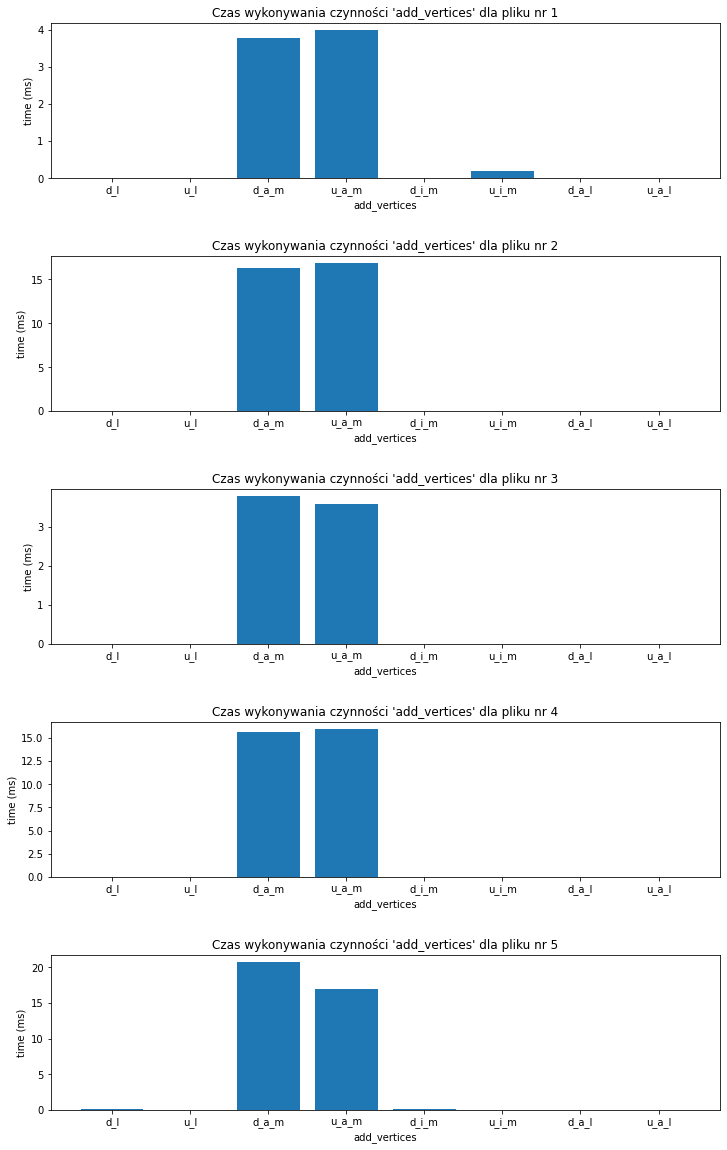

In [112]:
plot_measure_bar('add_vertices')

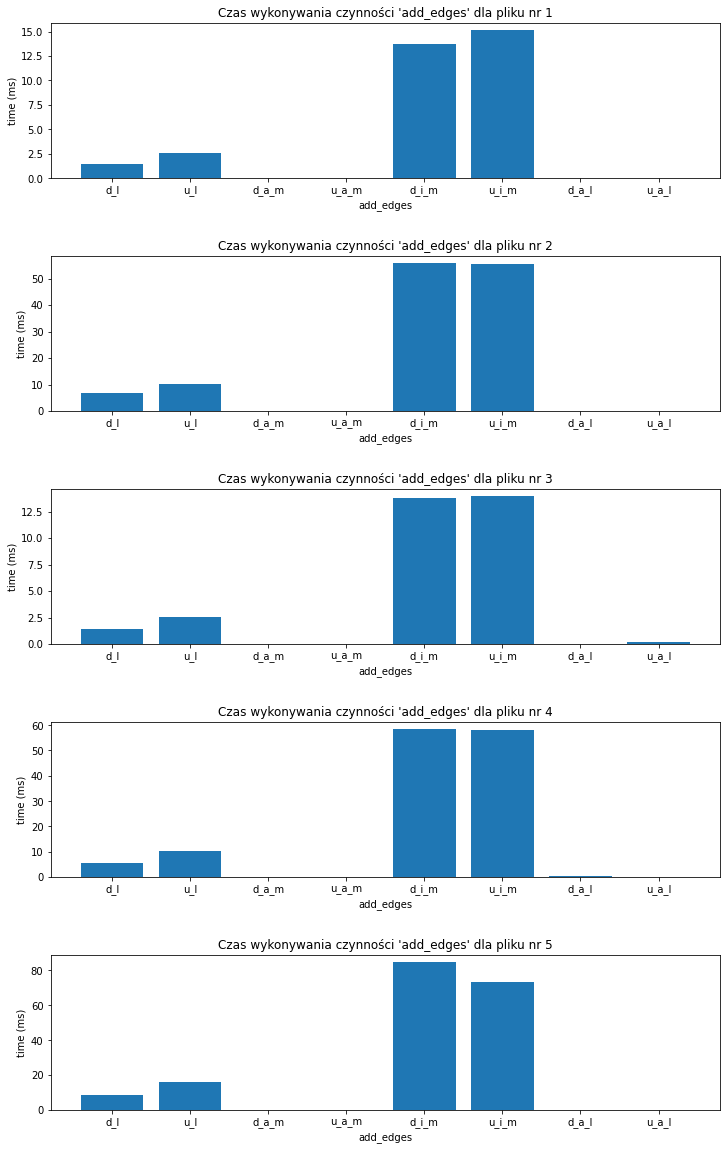

In [113]:
plot_measure_bar('add_edges')

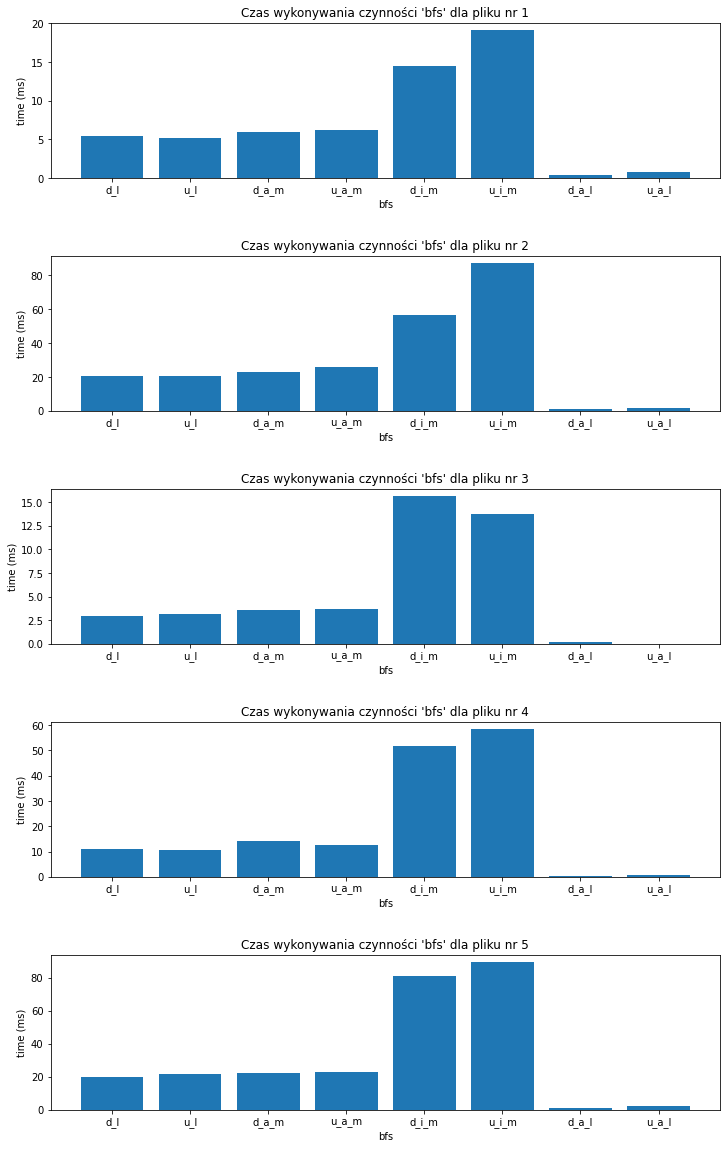

In [114]:
plot_measure_bar('bfs')

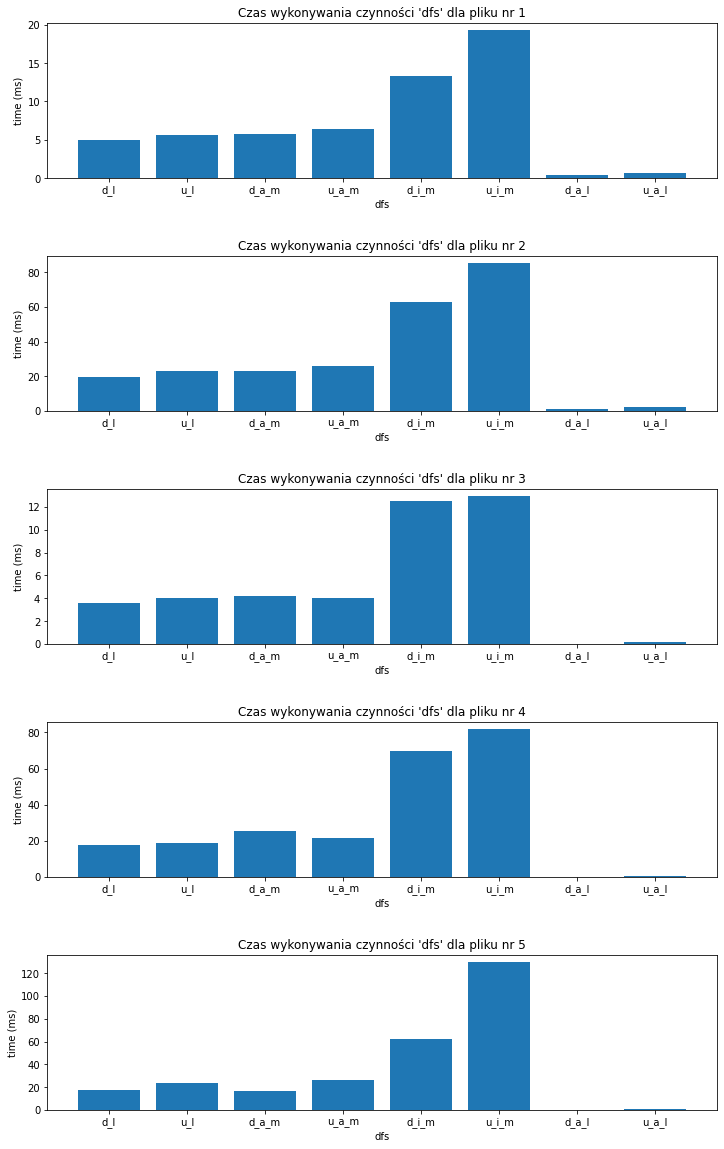

In [115]:
plot_measure_bar('dfs')

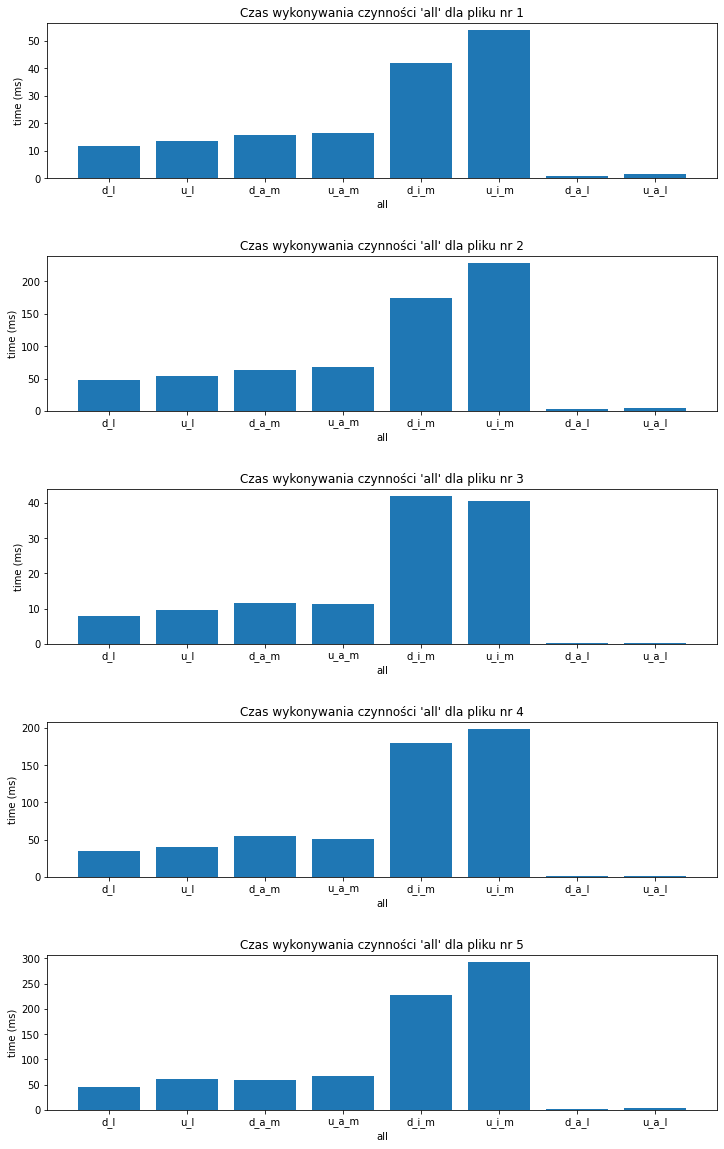

In [116]:
plot_measure_bar('all')